Input Parameter:
      N    P     K  temperature  humidity   ph  rainfall
0  2.0  2.0  12.0         29.0      50.0  5.6      56.0

KNN Accuracy is:  98.48 %
knn_train_accuracy =  98.77 %
knn_test_accuracy =  98.48 %



Crops Prediction (KNN Classifier):  mothbeans 

      N   P   K  temperature   humidity        ph    rainfall
100  71  54  16    22.613600  63.690706  5.749914   87.759539
101  61  44  17    26.100184  71.574769  6.931757  102.266244
102  80  43  16    23.558821  71.593514  6.657965   66.719955
103  73  58  21    19.972160  57.682729  6.596061   60.651715
104  61  38  20    18.478913  62.695039  5.970458   65.438354
..   ..  ..  ..          ...        ...       ...         ...
195  90  57  24    18.928519  72.800861  6.158860   82.341629
196  67  35  22    23.305468  63.246480  6.385684  108.760300
197  60  54  19    18.748267  62.498785  6.417820   70.234016
198  83  58  23    19.742133  59.662631  6.381202   65.508614
199  83  57  19    25.730444  70.747393  6.877869  

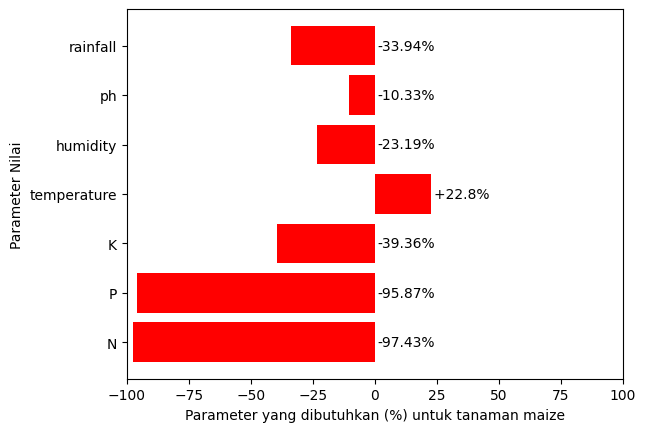

In [8]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import random
import re
import string
import warnings
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
warnings.filterwarnings('ignore')

crops = pd.read_csv('dataset/Crop_recommendation.csv')
crops['label'].unique()

acc = []
model = []
features = crops[['N', 'P','K','temperature', 'humidity', 'ph', 'rainfall']]
target = crops['label']


# tempN = round(random.uniform(10,100),2)
# tempP = round(random.uniform(10,100),2)
# tempK = round(random.uniform(10,100),2)
# tempt = round(random.uniform(10,50),2)
# temph = round(random.uniform(40,90),2)
# tempp = round(random.uniform(5,8),2)
# tempr = round(random.uniform(20,600),2)
tempN = 2
tempP = 2
tempK = 12
tempt = 29
temph = 50
tempp = 5.6
tempr = 56

x_values = np.array([[tempN, tempP, tempK, tempt, temph, tempp, tempr]])
x_data = pd.DataFrame(x_values, columns = ['N','P','K','temperature','humidity','ph','rainfall'])
print("Input Parameter:\n",x_data,end="\n")

x_train, x_test, y_train, y_test = train_test_split(features,target,test_size = 0.3,random_state =2)

knn = KNeighborsClassifier()

knn.fit(x_train,y_train)

ans = knn.predict(x_data)

predicted_values = knn.predict(x_test)

x = metrics.accuracy_score(y_test, predicted_values)
acc.append(x)
model.append('K Nearest Neighbours')
print("\nKNN Accuracy is: ", round((x*100),2), "%")

#Print Train Accuracy
knn_train_accuracy = knn.score(x_train,y_train)
print("knn_train_accuracy = ",round(knn.score(x_train,y_train)*100,2), "%")
#Print Test Accuracy
knn_test_accuracy = knn.score(x_test,y_test)
print("knn_test_accuracy = ", round(knn.score(x_test,y_test)*100,2), "%\n")

print("\n\nCrops Prediction (KNN Classifier): ",ans[0],"\n")


def convert_to_lower(text):
    return text.lower()
def remove_numbers(text):
    number_pattern = r'\d+'
    without_number = re.sub(pattern=number_pattern, repl=" ", string=text)
    return without_number
def remove_punctuation(text):
    return text.translate(str.maketrans('', '', string.punctuation))
def remove_extra_white_spaces(text):
    single_char_pattern = r'\s+[a-zA-Z]\s+'
    without_sc = re.sub(pattern=single_char_pattern, repl=" ", string=text)
    return without_sc

crop_x = input("Crop to be yield: ")
crop_x = convert_to_lower(remove_numbers(remove_punctuation(remove_extra_white_spaces(crop_x))))


if crop_x == 'apple' or crop_x == 'banana' or crop_x == 'rice' or crop_x =='jute' or crop_x == 'watermelon' or crop_x == 'maize'or crop_x == 'chickpea' or crop_x == 'kidneybeans'or crop_x == 'apple' or crop_x == 'mothbeans'or crop_x == 'mungbean' or crop_x == 'blackgram'or crop_x == 'lentil' or crop_x == 'pomegranate'or crop_x == 'banana' or crop_x == 'mango' or crop_x == 'grapes' or crop_x == 'muskmelon' or crop_x == 'orange' or crop_x == 'papaya' or crop_x == 'coconut' or crop_x == 'cotton' or crop_x == 'coffee' or crop_x == 'pigeonpeas':
    
    def deviatedornot(data, val):

        variance = np.var(data)
        squared_difference1 = (val - np.mean(data)) ** 2
        squared_difference2 = (np.mean(data) - val) ** 2

        if (squared_difference1 > variance) & (squared_difference2 > variance):
            return False
        else:
            return True

    x_rows = crops[crops['label']==crop_x]
    x_rows = x_rows.drop(['label'], axis=1)
    print(x_rows)
    
    #hitung mean setiap parameter
    x_N = x_rows['N'].mean()
    x_P = x_rows['P'].mean()
    x_K = x_rows['K'].mean()
    x_t = x_rows['temperature'].mean()
    x_h = x_rows['humidity'].mean()
    x_p = x_rows['ph'].mean()
    x_r = x_rows['rainfall'].mean()

    mean_val = [x_rows[col].mean() for col in x_rows.columns]
    #print(f"\n Hasil Rerata Tanaman {crop_x}")
    percent = []
    for x, y in zip(mean_val, x_data):
        if y == 'N' or y=='P' or y=='K':
            print("Nutrisi ",y," nilai Standart (Rerata): ",round(x,2), "dan Data Sensor:", round(x_data[y][0],2),"==>> Rekomendasi: ",round(x-x_data[y][0],2))
        elif y == 'humidity':
            print(y,"(RH/kelembaban) rata-rata : ",round(x,2), "dan Data Sensor:", round(x_data[y][0],2),"==>> Rekomendasi: ",round(x-x_data[y][0],2))
        elif y == 'ph':
            print(y,"(Potential of Hydrogen) rata-rata: ",round(x,2), "dan Data Sensor:", round(x_data[y][0],2),"==>> Rekomendasi: ",round(x-x_data[y][0],2))
        else:
            print(y,"nilai Standart (Rerata): ",round(x,2), "dan Data Sensor:", round(x_data[y][0],2),"==>> Rekomendasi: ",round(x-x_data[y][0],2))
        if x>x_data[y][0]:
            percent.append(-((x-x_data[y][0])*100/x))
        elif x<=x_data[y][0]:
            percent.append(((x_data[y][0]-x)*100/x_data[y][0]))


    if ans[0]==crop_x:
        print(f"\nThe current state of soil is {crop_x} ready\n\n")
    else:
        print(f"\n{crop_x} can't be planted is such conditions\n\n")

        param = ['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']

        plt.barh(param, percent, color='red')

        for i, p in enumerate(percent):
            if p>=0:
                plt.text(p+1, i, f"+{round(p,2)}% ", ha='left', va='center', color='black')
            else:
                plt.text(0+1, i, f"{round(p,2)}%", ha='left', va='center', color='black')
        plt.xlim(-100, 100)
        plt.xlabel(f"Parameter yang dibutuhkan (%) untuk tanaman {crop_x}")
        plt.ylabel('Parameter Nilai')
        #plt.title(f"Parameters Required for {crop_x}")
        plt.show()
else:
    print (f"{crop_x} recommendation is not found in dataset")

### Keterangan Tanda 'minus' dan 'plus'

##### 1. MINUS berdasarkan perbandingan dengan tanaman rekomendasi AI dengan tanaman yang diinginkan KEKURANGAN dalam Persentasi (%)
##### Perhitungan Yang dibutuhkan jika Minus sebagai berikut:
##### Nilai Ideal (minus) = Data dari sensor + (Nilai Standar x Persentasi nilai (parameter)), Maka hasil Nilai Ideal perlu ditambahkan agar hasi nilai sensor yang terbaca akan naik

##### 2. PLUS berdasarkan perbandingan dengan tanaman rekomendasi AI dengan tanaman yang diinginkan KELEBIHAN dalam Persentasi (%)
##### Perhitungan Yang dibutuhkan jika Plus sebagai berikut:
##### Nilai Ideal (Plus) = Data dari sensor x Persentasi nilai (parameter), maka hasil nilai Ideal dari sensor  perlu dikurangkan

In [9]:
import joblib
joblib.dump(knn, 'model/agroplan_model.joblib')

['model/agroplan_model.joblib']